# The Smoking Section - A Hip Hop Lifestyle Blog

### Exploring Blog Views

#### The Smoking Section (TSS) is a blog that recently became a part of the Uproxx Media community. It has been around for many years and has faced the evolution of the internet head on. The changes that TSS has made have been surprisingly successful, mostly due to the foresight and constant dedicated research from its owner, known by his online moniker as Gotty. I was priveledged to obtain a data set of some of the numbers they look at on their site, with the intent to draw insights and help guide Gotty with his ever-changing blog community through a data oriented approach.

###### STEP 1: Get the data into PD Dataframe and explore. File type is .xlsx and only contains data from January 1, 2015 to January 26, 2015

In [1]:
%load_ext sql

In [2]:
%matplotlib inline

from pandas import ExcelFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
from pymongo import MongoClient
from seaborn import plt, color_palette
from datetime import datetime
from datetime import date, time


In [12]:
data = pd.read_excel("Data/TSS 01.01.2015 - 01.26.2015.xlsx", sheet = 'Sheet1', index_col = 'PublishDate', encoding = 'ASCII')

In [13]:
data.head()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 715: ordinal not in range(128)

In [5]:
#We perform this step to fill all NaN's with the value 0. The majority of NaN's come from a "Tags" column, which is not current utilized
data = data.fillna(0)

In [6]:
#This is used to change the index 'PublishDate' to datetime objects
data.index = data.index.to_datetime()

In [7]:
data.head()

,URL,Title,Authors,Section,Tags,Views,Visitors,TwitterShares,FacebookShares,LinkedInShares,PinterestShares,TotalShares,DirectReferrers,SelfReferrers,InternalReferrers,SocialReferrers,SearchReferrers,OtherReferrers,Lifecycle
2015-01-21,http://uproxx.com/smokingsection/2015/01/presi...,President Obama Torched Republicans With This ...,GOTTY™,SMOKINGSECTION,0,70353,63147,57,11803,0,1,11861,11163,360,7147,49668,1516,499,0
2015-01-13,http://uproxx.com/smokingsection/2015/01/a-ran...,Ranking Rap’s Best One-Hit Wonders Of The Past...,TSS Crew,SMOKINGSECTION,0,69900,36349,76,978,1,1,1056,14732,28191,5305,11349,100,10223,0
2015-01-09,http://uproxx.com/smokingsection/2015/01/kevin...,Kevin Gates Wants You To Know He’s Having Sex ...,GOTTY™,SMOKINGSECTION,0,61289,55338,56,5611,0,0,5667,9252,185,6012,44876,867,97,0
2015-01-11,http://uproxx.com/smokingsection/2015/01/chris...,Five People Were Reportedly Shot During A Nigh...,GOTTY™,SMOKINGSECTION,0,41400,37605,68,2741,0,0,2809,6908,159,3395,28687,1295,956,0
2015-01-03,http://uproxx.com/smokingsection/2015/01/kobe-...,Now We See Why Kobe Curses Out His Teammates I...,J. Tinsley,SMOKINGSECTION,0,39124,33683,51,2165,0,0,2216,6761,183,10006,21456,380,338,0


In [27]:
#Referrers add up to views, so we want to look at ratios rather than raw data
data['DirectReferrersPercent'] = data['DirectReferrers']/data['Views']
data['SelfReferrersPercent'] = data['SelfReferrers']/data['Views']
data['InternalReferrersPercent'] = data['InternalReferrers']/data['Views']
data['SocialReferrersPercent'] = data['SocialReferrers']/data['Views']
data['SearchReferrersPercent'] = data['SearchReferrers']/data['Views']
data['OtherReferrersPercent'] = data['OtherReferrers']/data['Views']

data.head()

,URL,Title,Authors,Section,Tags,Views,Visitors,TwitterShares,FacebookShares,LinkedInShares,...,SearchReferrers,OtherReferrers,Lifecycle,DayOfWeek,DirectReferrersPercent,SelfReferrersPercent,InternalReferrersPercent,SocialReferrersPercent,SearchReferrersPercent,OtherReferrersPercent
2015-01-21,http://uproxx.com/smokingsection/2015/01/presi...,President Obama Torched Republicans With This ...,GOTTY™,SMOKINGSECTION,0,70353,63147,57,11803,0,...,1516,499,0,2,0.158671,0.005117,0.101588,0.705983,0.021548,0.007093
2015-01-13,http://uproxx.com/smokingsection/2015/01/a-ran...,Ranking Rap’s Best One-Hit Wonders Of The Past...,TSS Crew,SMOKINGSECTION,0,69900,36349,76,978,1,...,100,10223,0,1,0.210758,0.403305,0.075894,0.162361,0.001431,0.146252
2015-01-09,http://uproxx.com/smokingsection/2015/01/kevin...,Kevin Gates Wants You To Know He’s Having Sex ...,GOTTY™,SMOKINGSECTION,0,61289,55338,56,5611,0,...,867,97,0,4,0.150957,0.003018,0.098093,0.732203,0.014146,0.001583
2015-01-11,http://uproxx.com/smokingsection/2015/01/chris...,Five People Were Reportedly Shot During A Nigh...,GOTTY™,SMOKINGSECTION,0,41400,37605,68,2741,0,...,1295,956,0,6,0.166860,0.003841,0.082005,0.692923,0.031280,0.023092
2015-01-03,http://uproxx.com/smokingsection/2015/01/kobe-...,Now We See Why Kobe Curses Out His Teammates I...,J. Tinsley,SMOKINGSECTION,0,39124,33683,51,2165,0,...,380,338,0,5,0.172810,0.004677,0.255751,0.548410,0.009713,0.008639


In [8]:
#To access one day on the site, you can access the date explicitly, this will come in handy when calculating averages, etc.
data['2015-01-01']

,URL,Title,Authors,Section,Tags,Views,Visitors,TwitterShares,FacebookShares,LinkedInShares,PinterestShares,TotalShares,DirectReferrers,SelfReferrers,InternalReferrers,SocialReferrers,SearchReferrers,OtherReferrers,Lifecycle
2015-01-01,http://uproxx.com/smokingsection/2014/12/kanye...,Kanye West Season Returns With The Release Of ...,J. Tinsley,SMOKINGSECTION,0,16996,13093,115,2360,0,0,2475,2460,135,6017,4180,3851,353,0
2015-01-01,http://uproxx.com/smokingsection/2015/01/gucci...,Gucci Mane AKA ‘Gucci Balboa’ Puts His Boxing ...,TSS Crew,SMOKINGSECTION,0,5365,4373,44,28,0,0,72,2505,14,1575,342,816,113,0
2015-01-01,http://uproxx.com/smokingsection/2015/01/hip-h...,Hip-Hop Activist Harry Allen Responds To Mackl...,GOTTY™,SMOKINGSECTION,0,2767,2282,17,7,0,0,24,543,10,1783,191,42,198,0
2015-01-01,http://uproxx.com/smokingsection/2015/01/yg-an...,YG And DJ Mustard ‘Squabbled’ Then Made Friend...,GOTTY™,SMOKINGSECTION,0,1714,1492,15,16,0,0,31,216,2,1112,299,51,34,0
2015-01-01,http://uproxx.com/smokingsection/2015/01/the-d...,The-Dream And T.I.’s ‘That’s My Sh*t’ Is The S...,J. Tinsley,SMOKINGSECTION,0,1678,1374,10,3,0,0,13,269,4,1234,36,89,46,0
2015-01-01,http://uproxx.com/smokingsection/2015/01/my-to...,My Top 10 Sneaker Pickups For 2014,GOTTY™,SMOKINGSECTION,0,1356,1205,10,1,0,0,11,134,2,882,299,10,29,0
2015-01-01,http://uproxx.com/smokingsection/2015/01/2014-...,‘Bae’ And ‘Swag’ Are 2014’s Words That Need To...,Ryan Joseph,SMOKINGSECTION,0,1208,1009,27,19,0,0,46,142,1,863,100,43,59,0
2015-01-01,http://uproxx.com/smokingsection/2015/01/presi...,President Obama Answers A Chicago Teen’s Chris...,TSS Crew,SMOKINGSECTION,0,1077,978,23,5,0,0,28,174,1,632,90,7,173,0


In [9]:
#View of all column headings of dataset
data.columns

Index([u'URL', u'Title', u'Authors', u'Section', u'Tags', u'Views', u'Visitors', u'TwitterShares', u'FacebookShares', u'LinkedInShares', u'PinterestShares', u'TotalShares', u'DirectReferrers', u'SelfReferrers', u'InternalReferrers', u'SocialReferrers', u'SearchReferrers', u'OtherReferrers', u'Lifecycle'], dtype='object')

In [10]:
#basic summary statistics of the data set
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Tags,2046,0.000000,0.000000,0,0,0,0.0,0
Views,2046,602.373900,3209.060339,4,6,28,249.5,70353
Visitors,2046,485.787879,2604.754973,0,4,21,207.0,63147
TwitterShares,2046,4.844575,24.119695,0,0,0,0.0,722
FacebookShares,2046,21.552786,334.176255,0,0,0,0.0,11803
LinkedInShares,2046,0.004399,0.085531,0,0,0,0.0,3
PinterestShares,2046,0.016618,0.321545,0,0,0,0.0,12
TotalShares,2046,26.418377,339.249985,0,0,0,1.0,11861
DirectReferrers,2046,89.597263,547.650727,0,1,6,36.0,14732
SelfReferrers,2046,39.531769,673.190950,0,0,0,2.0,28191


In [11]:
#Create a column stating Day Of The Week 
data['DayOfWeek'] = data.index.map(lambda dt: dt.dayofweek)

In [21]:
#Take an initial look at correlation between factors
data.corr()

,Tags,Views,Visitors,TwitterShares,FacebookShares,LinkedInShares,PinterestShares,TotalShares,DirectReferrers,SelfReferrers,InternalReferrers,SocialReferrers,SearchReferrers,OtherReferrers,Lifecycle,DayOfWeek
Tags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Views,NaN,1.000000,0.977773,0.283328,0.744892,0.136719,0.141540,0.754064,0.975454,0.509232,0.688510,0.864841,0.323658,0.595469,NaN,0.034155
Visitors,NaN,0.977773,1.000000,0.284336,0.806939,0.091147,0.138328,0.815240,0.932974,0.320499,0.704724,0.921926,0.327626,0.464794,NaN,0.040403
TwitterShares,NaN,0.283328,0.284336,1.000000,0.174549,0.041812,0.053738,0.243097,0.267422,0.092818,0.411888,0.174764,0.072311,0.237846,NaN,0.039160
FacebookShares,NaN,0.744892,0.806939,0.174549,1.000000,0.015158,0.089515,0.997543,0.695031,0.074526,0.422929,0.888356,0.117146,0.153551,NaN,0.008664
LinkedInShares,NaN,0.136719,0.091147,0.041812,0.015158,1.000000,0.015121,0.018171,0.167247,0.239384,0.084607,0.039380,-0.005201,0.224059,NaN,0.030508
PinterestShares,NaN,0.141540,0.138328,0.053738,0.089515,0.015121,1.000000,0.092949,0.126923,0.080494,0.124420,0.116478,0.012488,0.117965,NaN,0.012146
TotalShares,NaN,0.754064,0.815240,0.243097,0.997543,0.018171,0.092949,1.000000,0.703812,0.080147,0.446028,0.887615,0.120545,0.168333,NaN,0.011338
DirectReferrers,NaN,0.975454,0.932974,0.267422,0.695031,0.167247,0.126923,0.703812,1.000000,0.581827,0.611280,0.818242,0.274871,0.674385,NaN,0.026497
SelfReferrers,NaN,0.509232,0.320499,0.092818,0.074526,0.239384,0.080494,0.080147,0.581827,1.000000,0.180778,0.151737,0.070262,0.796163,NaN,-0.015805


From the correlation matrix, you see that the sharing relationships have strong correlations.

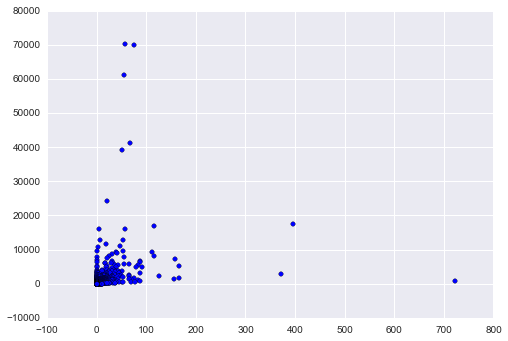

In [17]:
plt.scatter(data['TwitterShares'], data['Views'])

### This tells me that most of the shares are betwen 0 and 200, and the relationship between Twitter shares and views cannot really be seen easily

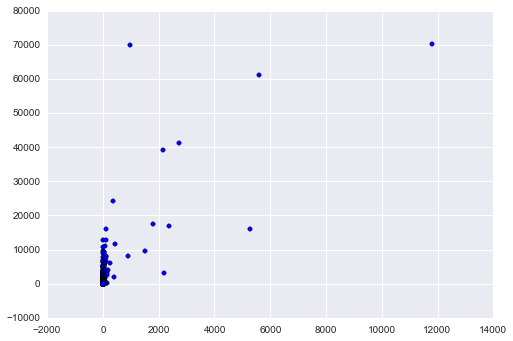

In [18]:
plt.scatter(data['FacebookShares'], data['Views'])

### This tells me that the majority of the shares are between 0 and 2000, and the relationship between Facebook Shares and Views could be linear without the outliers

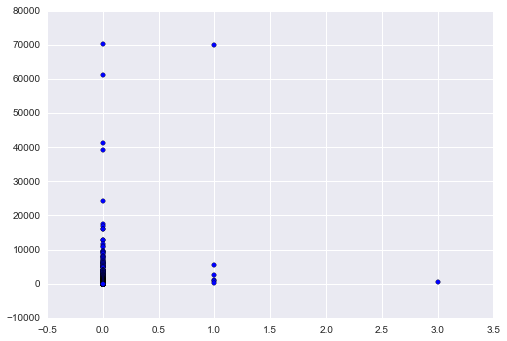

In [19]:
plt.scatter(data['LinkedInShares'], data['Views'])

### This shows me that the majority of the posts are not shared on LinkedIn

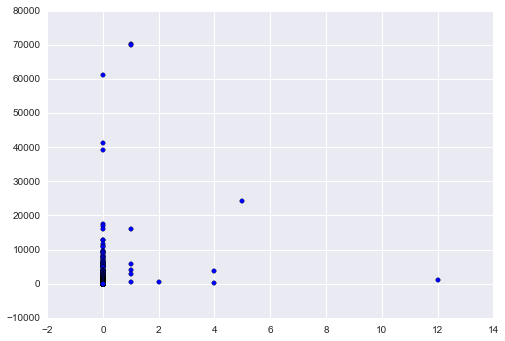

In [20]:
plt.scatter(data['PinterestShares'], data['Views'])

### This shows me that the majority of the posts are not shared on Pinterest

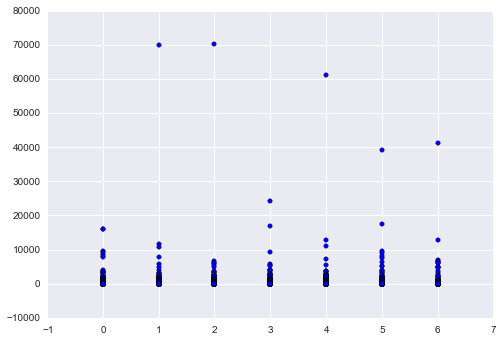

In [24]:
plt.scatter(data['DayOfWeek'], data['Views'])

### Day of week could be a significant discrete factor in predicting Views

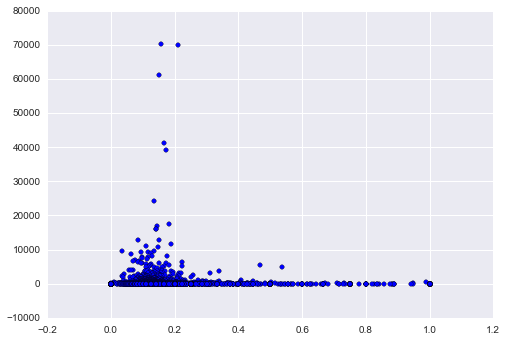

In [36]:
plt.scatter(data['DirectReferrersPercent'], data['Views'])

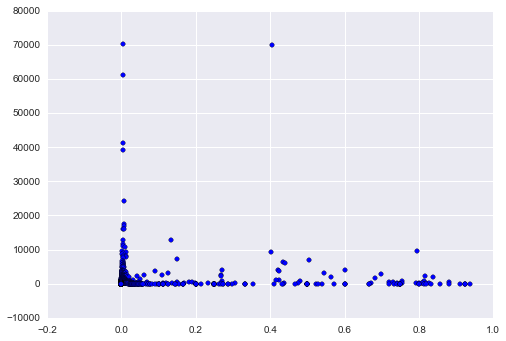

In [45]:
plt.scatter(data['SelfReferrersPercent'], data['Views'])

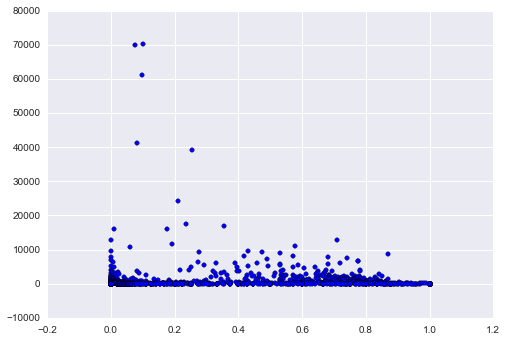

In [38]:
plt.scatter(data['InternalReferrersPercent'], data['Views'])

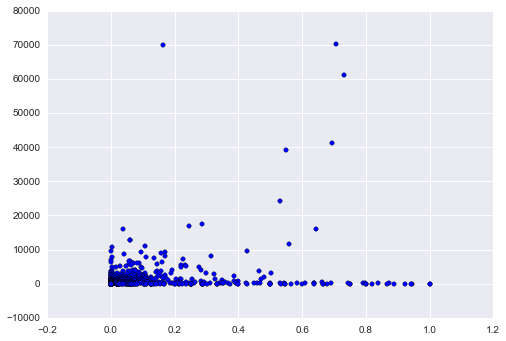

In [39]:
plt.scatter(data['SocialReferrersPercent'], data['Views'])

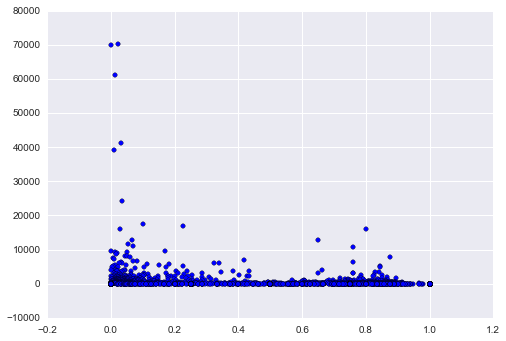

In [40]:
plt.scatter(data['SearchReferrersPercent'], data['Views'])

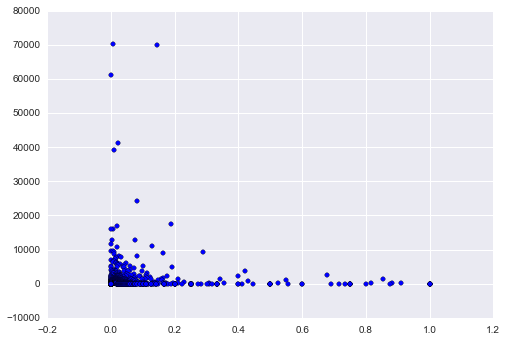

In [41]:
plt.scatter(data['OtherReferrersPercent'], data['Views'])

## From all of these scatterplots, I can assume that the only two social media outlets that have an impact on the Views should be Facebook and Twitter

In [30]:
#Split the types of columns into sets to explore each separately
shares_all = ['TwitterShares', 'FacebookShares', 'LinkedInShares', 'PinterestShares']
referrers = ['DirectReferrersPercent', 'SelfReferrersPercent', 'InternalReferrersPercent', 'SocialReferrersPercent', 'SearchReferrersPercent', 'OtherReferrersPercent']
authors = ['Authors']
shares_sig = ['TwitterShares', 'FacebookShares']

In [31]:
view_shareall_fit = smf.ols((data['Views'], data[shares_all]), data = data).fit()
view_shareall_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yViews   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     772.2
Date:                Tue, 03 Mar 2015   Prob (F-statistic):               0.00
Time:                        17:31:04   Log-Likelihood:                -18514.
No. Observations:                2046   AIC:                         3.704e+04
Df Residuals:                    2042   BIC:                         3.706e+04
Df Model:                           4                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
xTwitterShares      22.5448      1.889     11.934      0.000        18.840    26.250
xFacebookShares      6.8500      0.139     49.297      0.000         6.578     7.123
xLinkedInShares   4605.8537    533.020      8.641      0.000      3560.534  5651.173
xPinterestShares   716.3009    142.357      5.032      0.000       437.120   995.481
==============================================================================
Omnibus:                     3587.180   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8329759.721
Skew:                          11.645   Prob(JB):                         0.00
Kurtosis:                     314.717   Cond. No.                     3.92e+03
==============================================================================

Warnings:
[1] The condition number is large, 3.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
view_sharesig_fit = smf.ols((data['Views'], data[shares_sig]), data = data).fit()
view_sharesig_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yViews   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     1425.
Date:                Tue, 03 Mar 2015   Prob (F-statistic):               0.00
Time:                        17:31:07   Log-Likelihood:                -18564.
No. Observations:                2046   AIC:                         3.713e+04
Df Residuals:                    2044   BIC:                         3.714e+04
Df Model:                           2                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
xTwitterShares     23.7803      1.930     12.321      0.000        19.995    27.565
xFacebookShares     6.9188      0.142     48.794      0.000         6.641     7.197
==============================================================================
Omnibus:                     3907.687   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13135166.798
Skew:                          13.997   Prob(JB):                         0.00
Kurtosis:                     394.528   Cond. No.                         13.8
==============================================================================
"""

In [33]:
view_referral_fit = smf.ols((data['Views'], data[referrers]), data= data).fit()
view_referral_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 yViews   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     43.29
Date:                Tue, 03 Mar 2015   Prob (F-statistic):           5.48e-50
Time:                        17:31:31   Log-Likelihood:                -19334.
No. Observations:                2046   AIC:                         3.868e+04
Df Residuals:                    2040   BIC:                         3.871e+04
Df Model:                           6                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
xDirectReferrersPercent      64.2386    263.320      0.244      0.807      -452.165   580.642
xSelfReferrersPercent      1612.6543    496.461      3.248      0.001       639.031  2586.278
xInternalReferrersPercent   673.1872    175.586      3.834      0.000       328.841  1017.533
xSocialReferrersPercent    7386.1250    547.364     13.494      0.000      6312.674  8459.575
xSearchReferrersPercent      60.2076    133.441      0.451      0.652      -201.488   321.903
xOtherReferrersPercent      979.8269    623.983      1.570      0.117      -243.883  2203.536
==============================================================================
Omnibus:                     3953.138   Durbin-Watson:                   0.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6947687.863
Skew:                          14.747   Prob(JB):                         0.00
Kurtosis:                     286.951   Cond. No.                         5.40
==============================================================================
"""

In [148]:
# sum of referrers = views, must throw out referrers
author_fit = smf.ols('Views ~ Authors', data= data).fit()
author_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Views   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6651
Date:                Fri, 27 Feb 2015   Prob (F-statistic):              0.889
Time:                        11:16:22   Log-Likelihood:                -19413.
No. Observations:                2046   AIC:                         3.888e+04
Df Residuals:                    2021   BIC:                         3.902e+04
Df Model:                          24                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------------
Intercept                              71.2000    587.046      0.121      0.903     -1080.079  1222.479
Authors[T.Bansky]                     757.6706    636.741      1.190      0.234      -491.067  2006.408
Authors[T.Beware]                     472.7545    641.684      0.737      0.461      -785.676  1731.185
Authors[T.Chet Manley]               1175.3882    976.106      1.204      0.229      -738.891  3089.667
Authors[T.Dariel Figueroa]            527.8000   3268.536      0.161      0.872     -5882.252  6937.852
Authors[T.u'Darius Sinclair\u2122']    12.1333    958.643      0.013      0.990     -1867.898  1892.165
Authors[T.David D.]                     6.1803    700.171      0.009      0.993     -1366.952  1379.312
Authors[T.u'GOTTY\u2122']             886.3855    604.505      1.466      0.143      -299.132  2071.903
Authors[T.Greg Whitt]                 321.2746    721.010      0.446      0.656     -1092.726  1735.276
Authors[T.J. Tinsley]                 413.6924    616.864      0.671      0.503      -796.064  1623.449
Authors[T.Julie J.]                   186.4747    684.972      0.272      0.785     -1156.850  1529.799
Authors[T.LC Weber]                    88.0500   1711.520      0.051      0.959     -3268.477  3444.577
Authors[T.MZ]                         -41.0000   1553.179     -0.026      0.979     -3086.999  3004.999
Authors[T.Raj]                        168.0917    880.570      0.191      0.849     -1558.827  1895.011
Authors[T.Retro Boogie]               177.4731    737.187      0.241      0.810     -1268.253  1623.199
Authors[T.Ryan J.]                    301.5895    785.299      0.384      0.701     -1238.491  1841.670
Authors[T.Ryan Joseph]                740.1333    830.209      0.892      0.373      -888.022  2368.288
Authors[T.S. Cadet]                   746.3000   1279.438      0.583      0.560     -1762.855  3255.455
Authors[T.Samir S.]                    22.2615   1067.665      0.021      0.983     -2071.577  2116.100
Authors[T.Super Admin]                -35.2000   3268.536     -0.011      0.991     -6445.252  6374.852
Authors[T.TC]                          14.3000    861.549      0.017      0.987     -1675.316  1703.916
Authors[T.TSS Crew]                   554.6713    612.844      0.905      0.366      -647.201  1756.543
Authors[T.Trackstar The DJ]           -45.8667   1947.013     -0.024      0.981     -3864.228  3772.495
Authors[T.Word]                       272.3364    662.278      0.411      0.681     -1026.482  1571.155
Authors[T.scadet]                     114.7000   1174.093      0.098      0.922     -2187.859  2417.259
==============================================================================
Omnibus:                     4076.837   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7858455.206
Skew:        

In [108]:
finalmodeldata = ['TwitterShares', 'FacebookShares', 'LinkedInShares', 'PinterestShares', 'Authors', 'DayOfWeek']

In [137]:
finalmodel = smf.ols('Views ~ TwitterShares + FacebookShares + LinkedInShares + PinterestShares', data = data).fit()
finalmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Views   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     758.8
Date:                Fri, 27 Feb 2015   Prob (F-statistic):               0.00
Time:                        11:05:45   Log-Likelihood:                -18489.
No. Observations:                2046   AIC:                         3.699e+04
Df Residuals:                    2041   BIC:                         3.702e+04
Df Model:                           4                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         327.3115     46.022      7.112      0.000       237.057   417.566
TwitterShares      20.0448      1.899     10.553      0.000        16.320    23.770
FacebookShares      6.8248      0.137     49.692      0.000         6.555     7.094
LinkedInShares   4450.4367    527.118      8.443      0.000      3416.692  5484.181
PinterestShares   678.9579    140.758      4.824      0.000       402.914   955.002
==============================================================================
Omnibus:                     3651.484   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8768726.640
Skew:                          12.112   Prob(JB):                         0.00
Kurtosis:                     322.800   Cond. No.                     3.92e+03
==============================================================================

Warnings:
[1] The condition number is large, 3.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
#Create new dataframe for prediction
#new_data = pd.DataFrame(data = [0,0,0,0], columns = ['TwitterShares', 'FacebookShares', 'LinkedInShares', 'PinterestShares'])
#views_hat = finalmodel.predict(new_data)

In [90]:
#The maximum views on a post:
max(data['Views'])

70353

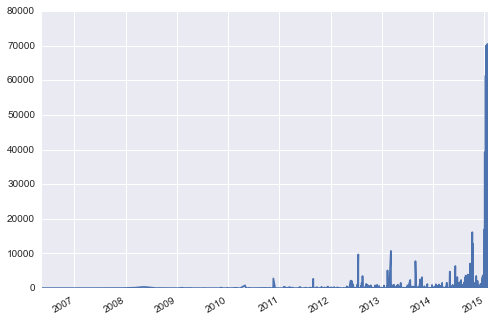

In [57]:
#Line plot of 'Views' after datetime
data['Views'].plot()

In [158]:
AuthorData1 = data[['Authors']]
AuthorData1['NumberOfPosts'] = AuthorData1.groupby('Authors').aggregate(sum)

ValueError: Wrong number of items passed 0, placement implies 1

In [144]:
AuthorData2 = data[['Views', 'Authors']].groupby('Authors').aggregate(sum).sort('Views', ascending = False)
AuthorData2['ViewPerPost'] = AuthorData

,Views
Authors,
GOTTY™,475920
TSS Crew,209041
Bansky,140908
J. Tinsley,139649
Beware,83769
Word,37789
Ryan Joseph,24340
Greg Whitt,23156
Julie J.,21387


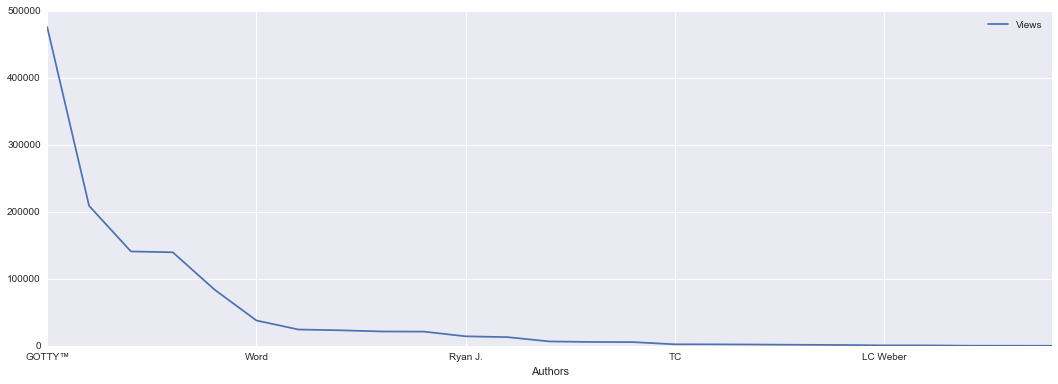

In [127]:
AuthorsViews.groupby('Authors').aggregate(sum).sort('Views', ascending = False).plot(figsize = (18,6))

In [120]:
#Want to add number of posts by each author in this view as well and average here
#This should show a clear correlation between the author and the number of views. 
#I should code the authors to be studied through regression model....

In [107]:
newest_data = data['2015']

print "2015:", len(data['2015'])
print "2014:", len(data['2014'])
print "2013:", len(data['2013'])
print "2012:", len(data['2012'])
print "2011:", len(data['2011'])
print "2010:", len(data['2010'])
print "2009:", len(data['2009'])
print "2008:", len(data['2008'])
print "2007:", len(data['2007'])
print "2006:", len(data['2006'])
print "2005:", len(data['2005'])

2015: 312
2014: 1033
2013: 291
2012: 203
2011: 111
2010: 43
2009: 38
2008: 10
2007: 4
2006: 1
2005: 0


In [180]:
data.corr()

,Tags,Views,Visitors,TwitterShares,FacebookShares,LinkedInShares,PinterestShares,TotalShares,DirectReferrers,SelfReferrers,InternalReferrers,SocialReferrers,SearchReferrers,OtherReferrers,Lifecycle
Tags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Views,NaN,1.000000,0.977773,0.283328,0.744892,0.136719,0.141540,0.754064,0.975454,0.509232,0.688510,0.864841,0.323658,0.595469,NaN
Visitors,NaN,0.977773,1.000000,0.284336,0.806939,0.091147,0.138328,0.815240,0.932974,0.320499,0.704724,0.921926,0.327626,0.464794,NaN
TwitterShares,NaN,0.283328,0.284336,1.000000,0.174549,0.041812,0.053738,0.243097,0.267422,0.092818,0.411888,0.174764,0.072311,0.237846,NaN
FacebookShares,NaN,0.744892,0.806939,0.174549,1.000000,0.015158,0.089515,0.997543,0.695031,0.074526,0.422929,0.888356,0.117146,0.153551,NaN
LinkedInShares,NaN,0.136719,0.091147,0.041812,0.015158,1.000000,0.015121,0.018171,0.167247,0.239384,0.084607,0.039380,-0.005201,0.224059,NaN
PinterestShares,NaN,0.141540,0.138328,0.053738,0.089515,0.015121,1.000000,0.092949,0.126923,0.080494,0.124420,0.116478,0.012488,0.117965,NaN
TotalShares,NaN,0.754064,0.815240,0.243097,0.997543,0.018171,0.092949,1.000000,0.703812,0.080147,0.446028,0.887615,0.120545,0.168333,NaN
DirectReferrers,NaN,0.975454,0.932974,0.267422,0.695031,0.167247,0.126923,0.703812,1.000000,0.581827,0.611280,0.818242,0.274871,0.674385,NaN
SelfReferrers,NaN,0.509232,0.320499,0.092818,0.074526,0.239384,0.080494,0.080147,0.581827,1.000000,0.180778,0.151737,0.070262,0.796163,NaN


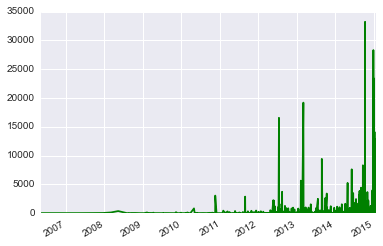

In [108]:
pd.rolling_mean(data['Views'], window = 12).plot(style = '-g')

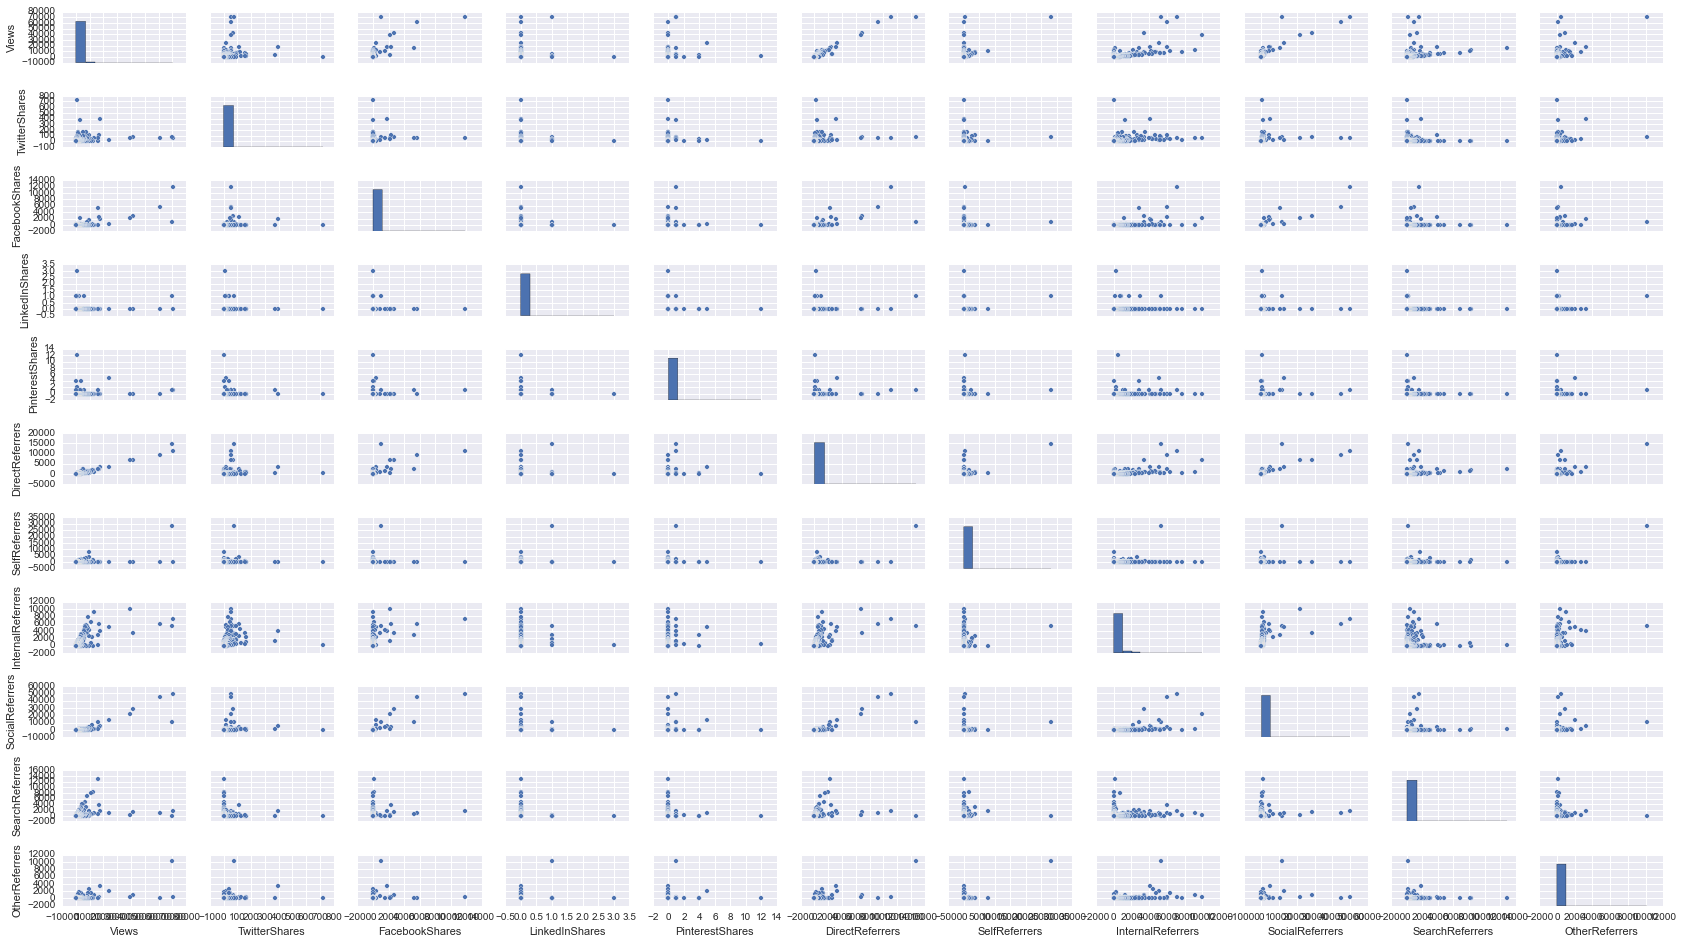

In [118]:
data_numerical_only = data[['Views', 'TwitterShares','FacebookShares','LinkedInShares',
                     'PinterestShares', 'DirectReferrers', 'SelfReferrers',
                     'InternalReferrers', 'SocialReferrers', 'SearchReferrers', 
                     'OtherReferrers']]
sns.pairplot(data_numerical_only, size = 1.2, aspect = 1.75)

In [119]:
data_numerical_only.corr()

,Views,TwitterShares,FacebookShares,LinkedInShares,PinterestShares,DirectReferrers,SelfReferrers,InternalReferrers,SocialReferrers,SearchReferrers,OtherReferrers
Views,1.000000,0.283328,0.744892,0.136719,0.141540,0.975454,0.509232,0.688510,0.864841,0.323658,0.595469
TwitterShares,0.283328,1.000000,0.174549,0.041812,0.053738,0.267422,0.092818,0.411888,0.174764,0.072311,0.237846
FacebookShares,0.744892,0.174549,1.000000,0.015158,0.089515,0.695031,0.074526,0.422929,0.888356,0.117146,0.153551
LinkedInShares,0.136719,0.041812,0.015158,1.000000,0.015121,0.167247,0.239384,0.084607,0.039380,-0.005201,0.224059
PinterestShares,0.141540,0.053738,0.089515,0.015121,1.000000,0.126923,0.080494,0.124420,0.116478,0.012488,0.117965
DirectReferrers,0.975454,0.267422,0.695031,0.167247,0.126923,1.000000,0.581827,0.611280,0.818242,0.274871,0.674385
SelfReferrers,0.509232,0.092818,0.074526,0.239384,0.080494,0.581827,1.000000,0.180778,0.151737,0.070262,0.796163
InternalReferrers,0.688510,0.411888,0.422929,0.084607,0.124420,0.611280,0.180778,1.000000,0.491100,0.149851,0.385652
SocialReferrers,0.864841,0.174764,0.888356,0.039380,0.116478,0.818242,0.151737,0.491100,1.000000,0.111619,0.244556
SearchReferrers,0.323658,0.072311,0.117146,-0.005201,0.012488,0.274871,0.070262,0.149851,0.111619,1.000000,0.071467


In [113]:
#Model idea: Views = B0 + BN*Factors
lm = smf.ols('Views ~ TwitterShares + FacebookShares + PinterestShares + DirectReferrers + SelfReferrers + InternalReferrers + SocialReferrers + OtherReferrers', data = datapairplot)
#lm = smf.ols('Views ~ TwitterShares', data = data)
fit1 = lm.fit()
print fit1.summary()

                            OLS Regression Results                            
Dep. Variable:                  Views   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.518e+04
Date:                Thu, 19 Feb 2015   Prob (F-statistic):               0.00
Time:                        17:16:32   Log-Likelihood:                -15222.
No. Observations:                2046   AIC:                         3.046e+04
Df Residuals:                    2037   BIC:                         3.051e+04
Df Model:                           8                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept            53.5180      9.631      5.557      0.000        34.630    72.406
TwitterShares        -0.1737   

In [117]:
datapairplot.corr()

,Views,TwitterShares,FacebookShares,LinkedInShares,PinterestShares,DirectReferrers,SelfReferrers,InternalReferrers,SocialReferrers,SearchReferrers,OtherReferrers
Views,1.000000,0.283328,0.744892,0.136719,0.141540,0.975454,0.509232,0.688510,0.864841,0.323658,0.595469
TwitterShares,0.283328,1.000000,0.174549,0.041812,0.053738,0.267422,0.092818,0.411888,0.174764,0.072311,0.237846
FacebookShares,0.744892,0.174549,1.000000,0.015158,0.089515,0.695031,0.074526,0.422929,0.888356,0.117146,0.153551
LinkedInShares,0.136719,0.041812,0.015158,1.000000,0.015121,0.167247,0.239384,0.084607,0.039380,-0.005201,0.224059
PinterestShares,0.141540,0.053738,0.089515,0.015121,1.000000,0.126923,0.080494,0.124420,0.116478,0.012488,0.117965
DirectReferrers,0.975454,0.267422,0.695031,0.167247,0.126923,1.000000,0.581827,0.611280,0.818242,0.274871,0.674385
SelfReferrers,0.509232,0.092818,0.074526,0.239384,0.080494,0.581827,1.000000,0.180778,0.151737,0.070262,0.796163
InternalReferrers,0.688510,0.411888,0.422929,0.084607,0.124420,0.611280,0.180778,1.000000,0.491100,0.149851,0.385652
SocialReferrers,0.864841,0.174764,0.888356,0.039380,0.116478,0.818242,0.151737,0.491100,1.000000,0.111619,0.244556
SearchReferrers,0.323658,0.072311,0.117146,-0.005201,0.012488,0.274871,0.070262,0.149851,0.111619,1.000000,0.071467
